<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [3945]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.callbacks as callbacks

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3946]:
ds = pd.read_csv("bank-1.csv") 

## Data Overview

In [3947]:
# viewing the first 5 rows of the dataset
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3948]:
# Display the shape of the dataset
print("Shape of the dataset: ", ds.shape)

Shape of the dataset:  (10000, 14)


In [3949]:
# Display the data types of the columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3950]:
# Display the statistics of the dataset
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [3951]:
# Check for missing values
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3952]:
# Check for duplicate rows
ds.duplicated().sum()

0

In [3953]:
# Check the unique values for each column
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [3954]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [3955]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [3956]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

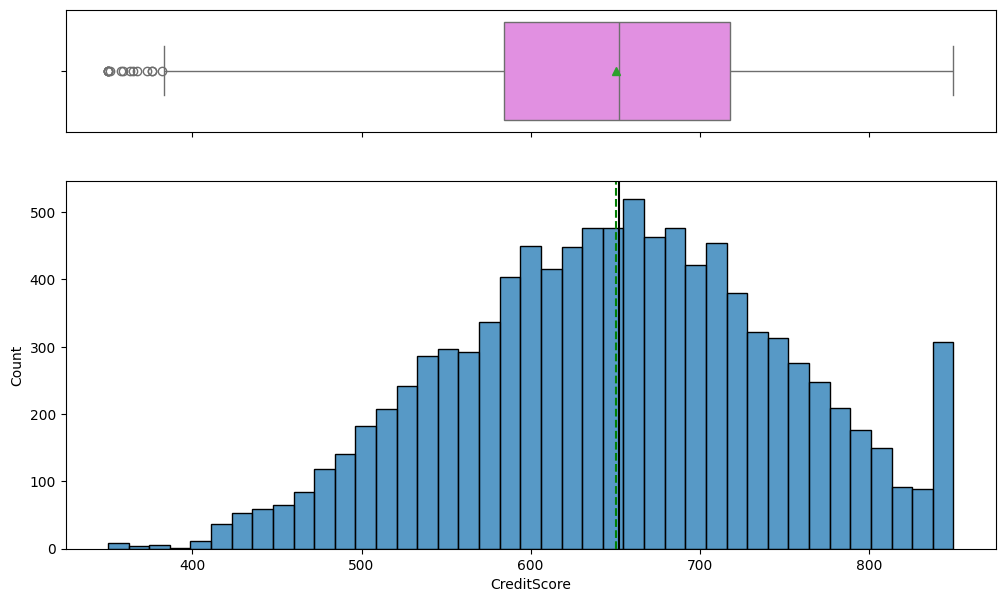

In [3957]:
histogram_boxplot(ds,'CreditScore')

**Observations**
- The distribution of credit score is normal.

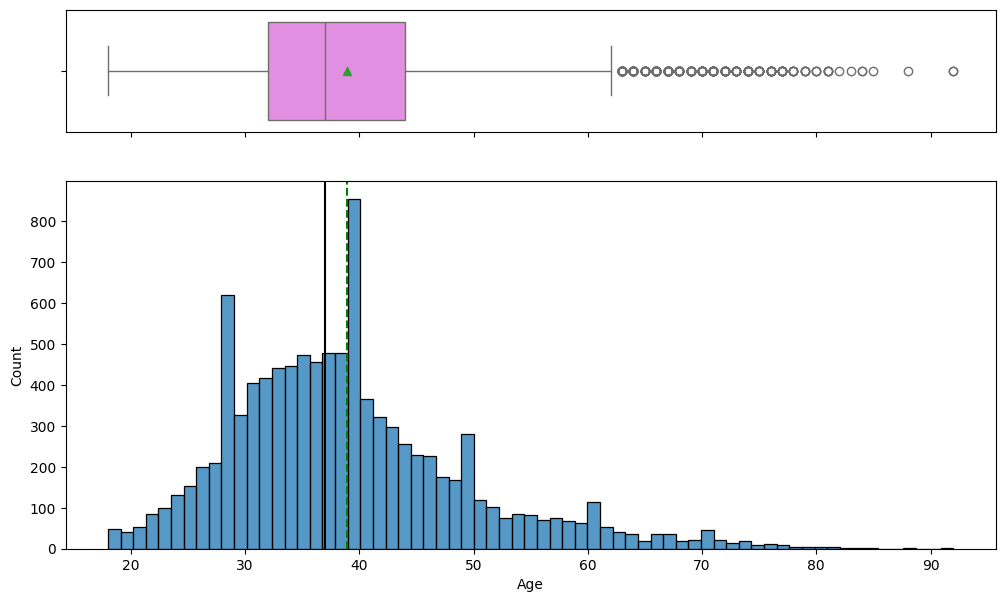

In [3958]:
histogram_boxplot(ds,'Age')

**Observations**
- The distribution of age is right skewed with few outliers on the right.

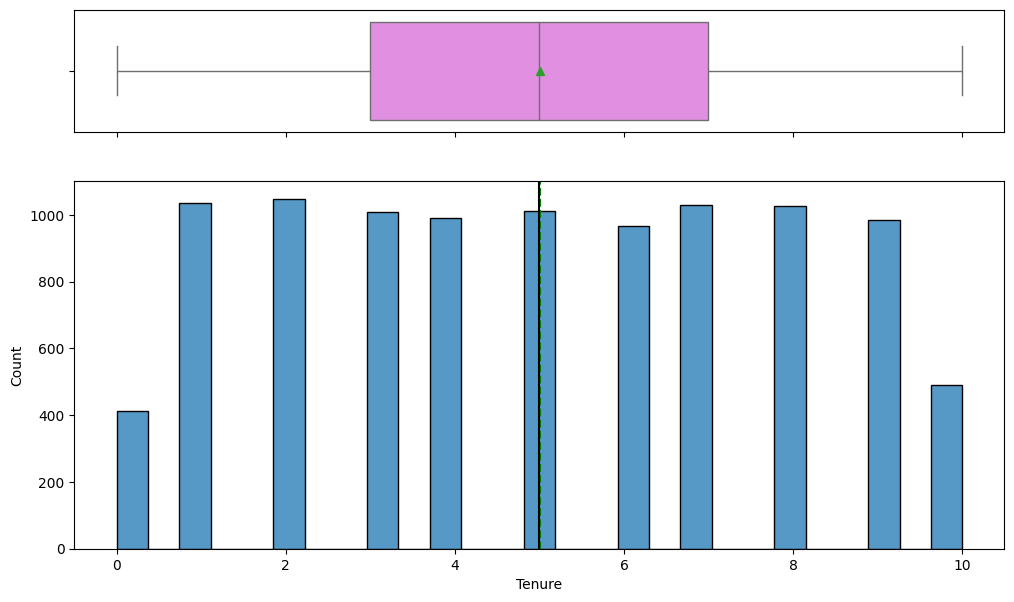

In [3959]:
histogram_boxplot(ds,'Tenure')

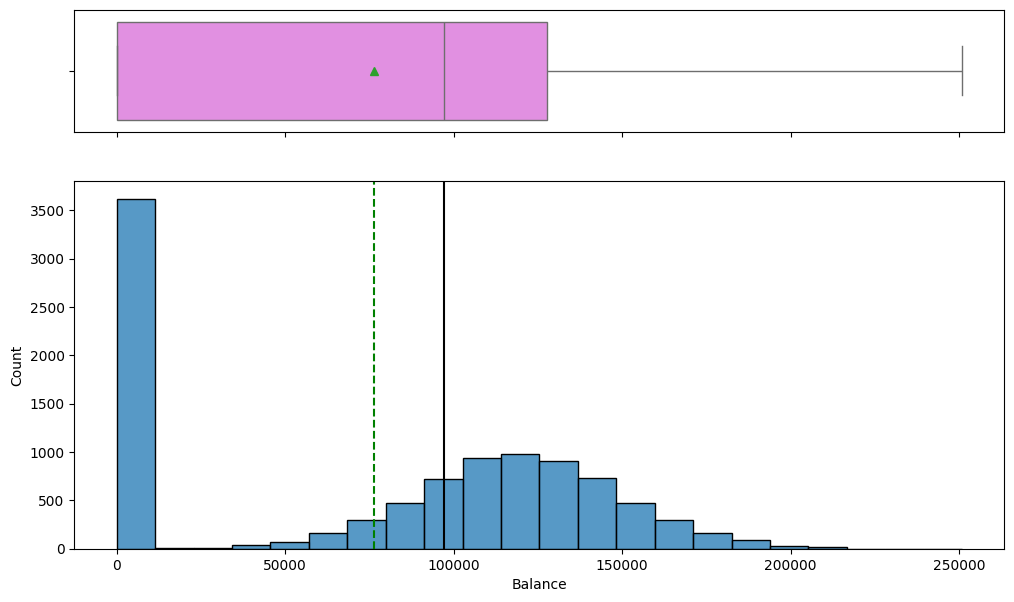

In [3960]:
histogram_boxplot(ds,'Balance')

**Observations**
- The distribution of Balance has a left skew due to the presence of high number of 0 balance accounts.

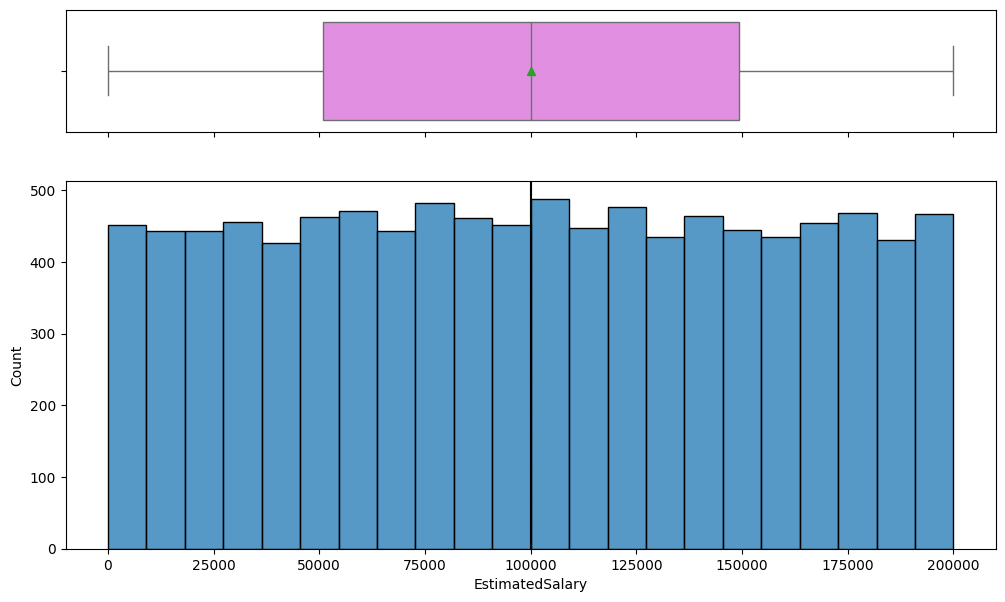

In [3961]:
histogram_boxplot(ds,'EstimatedSalary')

**Observations**
- The distribution of salary is uniform.

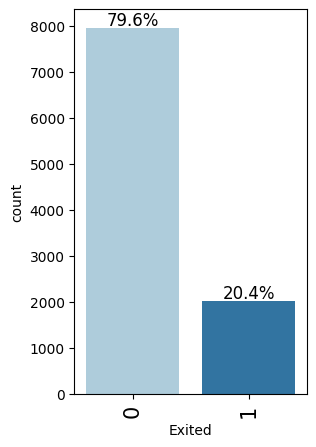

In [3962]:
labeled_barplot(ds,'Exited', perc=True)

**Observations**
- The dateset have around 80% cutomers who stays and only 20.4% are exiting the bank.
- This is an unbalanced dataset.

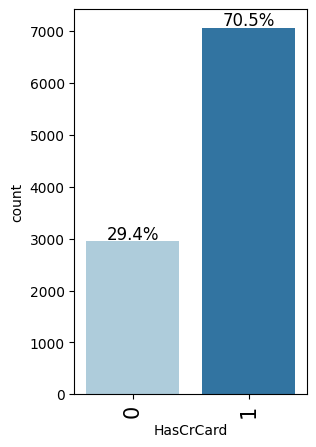

In [3963]:
labeled_barplot(ds,'HasCrCard', perc=True)

**Observations**
- 70.5% customers in the dataset have a credit card.

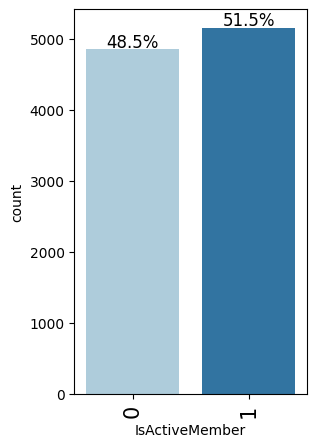

In [3964]:
labeled_barplot(ds,'IsActiveMember', perc=True)

**Observations**
- Around 51.5% members are active on banking.

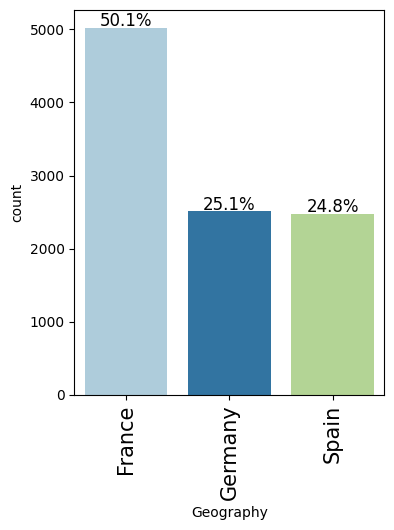

In [3965]:
labeled_barplot(ds,'Geography', perc=True)

**Observations**
- Around 50% of customers are from France.

### Bivariate Analysis

In [3966]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [3967]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

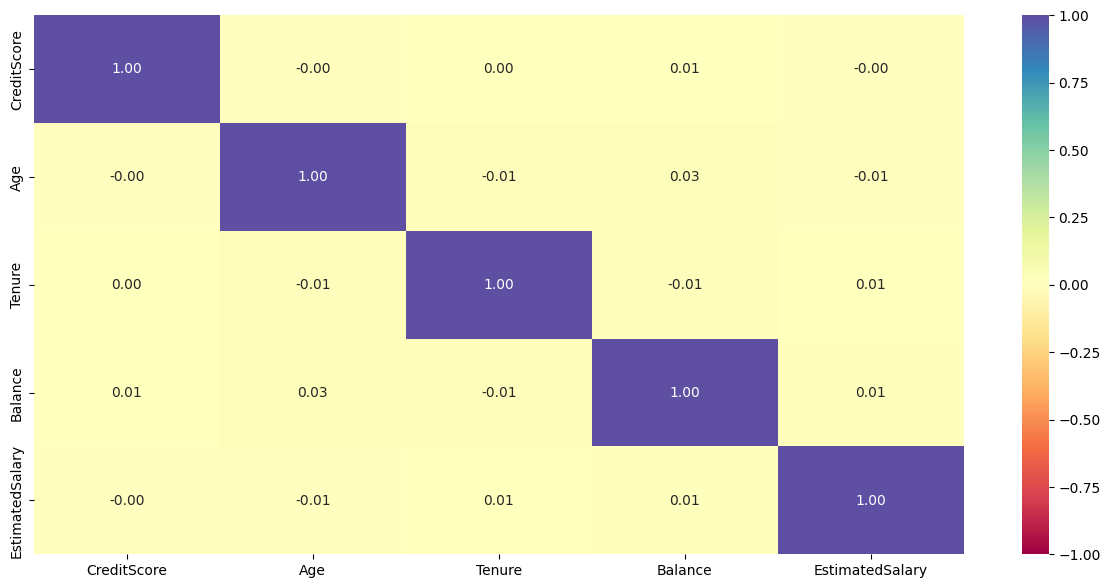

In [3968]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


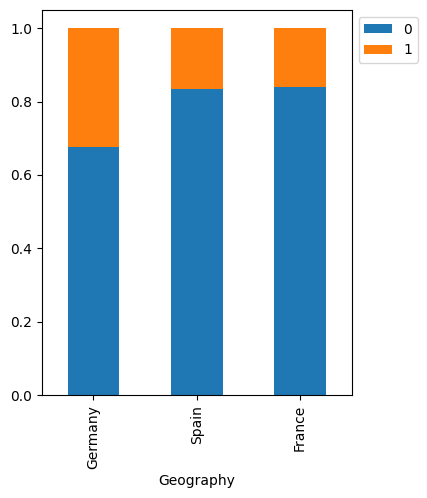

In [3969]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


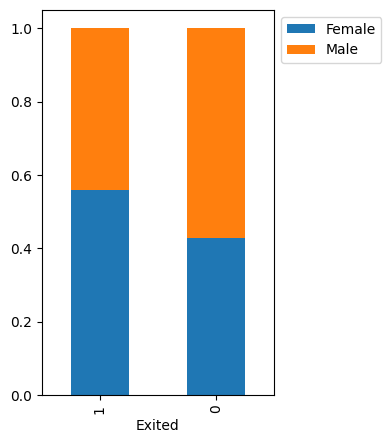

In [3970]:
stacked_barplot(ds, "Exited", "Gender")             

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


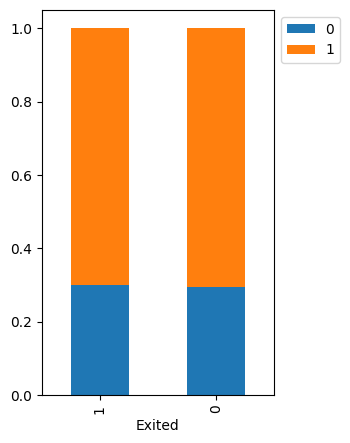

In [3971]:
stacked_barplot(ds, "Exited", "HasCrCard") 

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


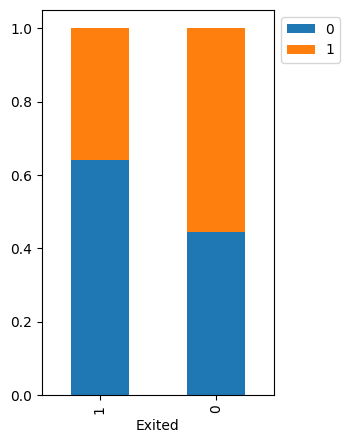

In [3972]:
stacked_barplot(ds, "Exited", "IsActiveMember") 

#### Exited Vs NumOfProducts

NumOfProducts     1     2    3   4    All
Exited                                   
1              1409   348  220  60   2037
All            5084  4590  266  60  10000
0              3675  4242   46   0   7963
------------------------------------------------------------------------------------------------------------------------


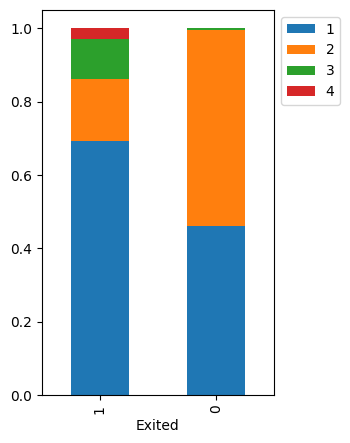

In [3973]:
stacked_barplot(ds, 'Exited' ,'NumOfProducts')

#### Exited Vs Credit Score

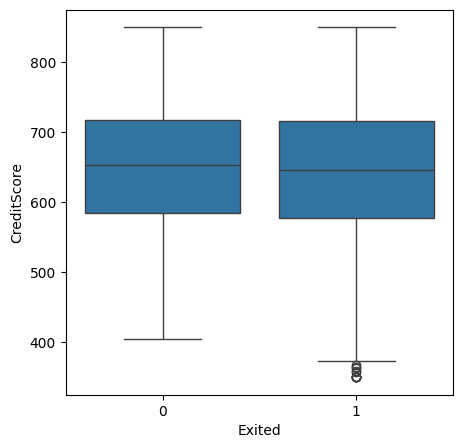

In [3974]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

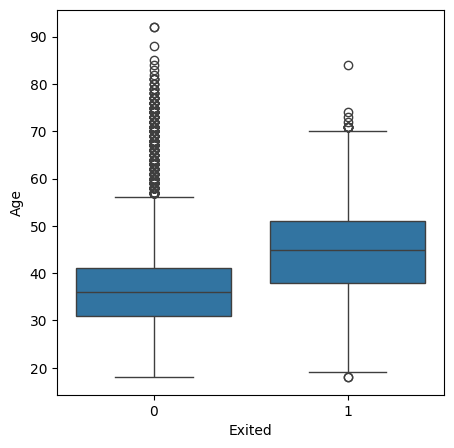

In [3975]:
plt.figure(figsize=(5,5))
sns.boxplot(y="Age",x="Exited",data=ds)
plt.show()

#### Exited Vs Tenure

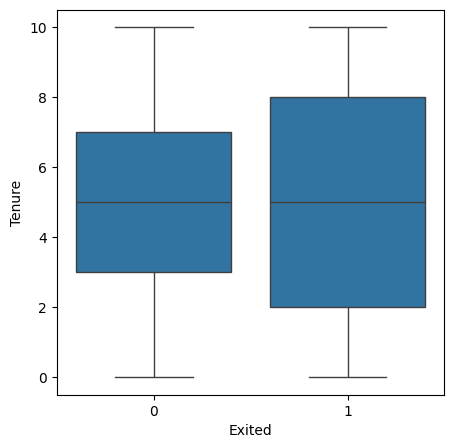

In [3976]:
plt.figure(figsize=(5,5))
sns.boxplot(y="Tenure",x="Exited",data=ds)
plt.show()

#### Exited Vs Balance

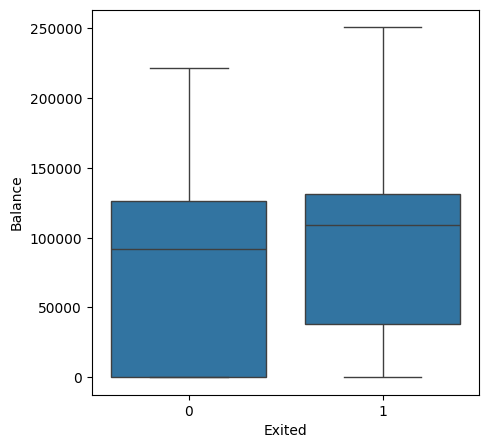

In [3977]:
plt.figure(figsize=(5,5))
sns.boxplot(y="Balance",x="Exited",data=ds)
plt.show()

#### Exited Vs Number of Products

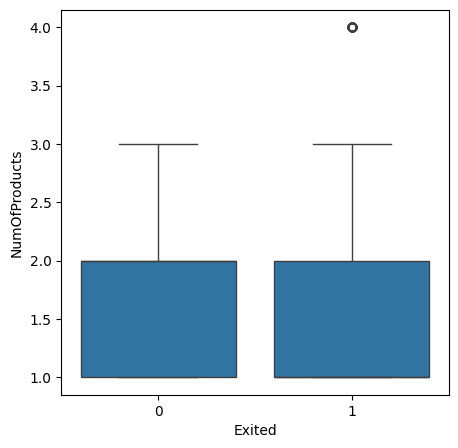

In [3978]:
plt.figure(figsize=(5,5))
sns.boxplot(y="NumOfProducts",x="Exited",data=ds)
plt.show()

#### Exited Vs Estimated Salary

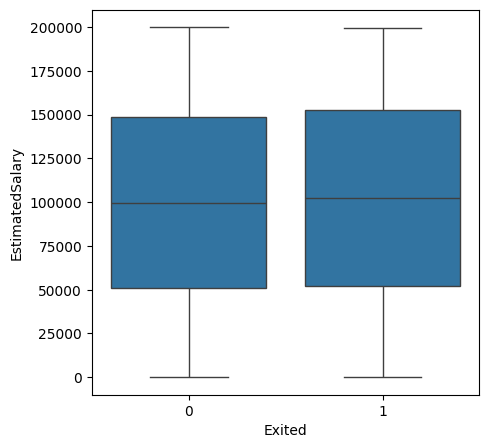

In [3979]:
plt.figure(figsize=(5,5))
sns.boxplot(y="EstimatedSalary",x="Exited",data=ds)
plt.show()

**EDA Observations**
- Approximately 50% of the Customers in the dataset are from France.
- 70.5% of the customers in dataset own a credit card.
- The dateset have around 80% cutomers who stays and only 20.4% are exiting the bank.
- Overall, the dataset exhibits low correlations between its variables.

## Data Preprocessing

### Dummy Variable Creation

In [3980]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [3981]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [3982]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42,stratify=y,shuffle = True)

In [3983]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) 

In [3984]:
print(X_train.shape, X_val.shape, X_test.shape)

(7200, 11) (1800, 11) (1000, 11)


In [3985]:
print(y_train.shape, y_val.shape, y_test.shape)

(7200,) (1800,) (1000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [3986]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])  

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

- Predicting a customer is exiting and the customer is not exiting (False Positive - FP)
- Predicting a customer is not exiting and customer is exiting (False Negative - FN)

**Which case is more important?**

- Reduing the False Negatives (FN) are important - predicting a customer is not exiting but he/she is exiting.
- FN can cause negative impact to the bank because the bank will not offer these customers any promotions to retain.

**How to reduce False Negative?**

- Recall to be maximized, greater the Recall higher the chances of minimizing FN. 


**Let's create a function for plotting the confusion matrix**

In [3987]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [3988]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [3989]:
backend.clear_session() # clear the session to avoid clutter from old models
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [3990]:
# Initializing the neural network
model_0 = Sequential()
# Adding the input layer and the first hidden layer
model_0.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
# Adding the second hidden layer
model_0.add(Dense(16, activation="relu"))
# Adding the third hidden layer
model_0.add(Dense(1, activation="sigmoid"))

In [3991]:
optimizer = tf.keras.optimizers.SGD(0.001)
metric = tf.keras.metrics.Recall()

In [3992]:
# Compiling the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[metric],
)

In [3993]:
# Compiling the model summary
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,825 (7.13 KB)

 Trainable params: 1,825 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

In [3994]:
# Fitting the model
history_0 = model_0.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.5884 - recall: 0.1643 - val_loss: 0.5652 - val_recall: 0.0463
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.5425 - recall: 0.0721 - val_loss: 0.5361 - val_recall: 0.0272
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.5145 - recall: 0.0390 - val_loss: 0.5187 - val_recall: 0.0109
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.4973 - recall: 0.0056 - val_loss: 0.5080 - val_recall: 0.0109
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.4862 - recall: 0.0033 - val_loss: 0.5010 - val_recall: 0.0109
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.4787 - recall: 0.0028 - val_loss: 0.4960 - val_recall: 0.0109
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.4731 - recall: 0.0034 - val_loss: 0.4922 - val_recall: 0.0109
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.4687 - recall: 0.0034 - val_loss: 0.4890 - val_recall:

**Loss Function**

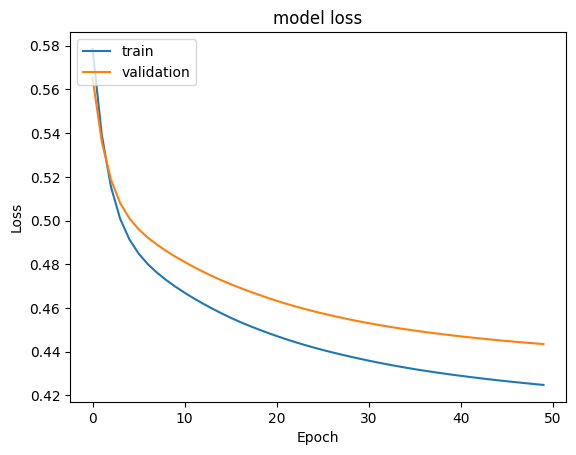

In [3995]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

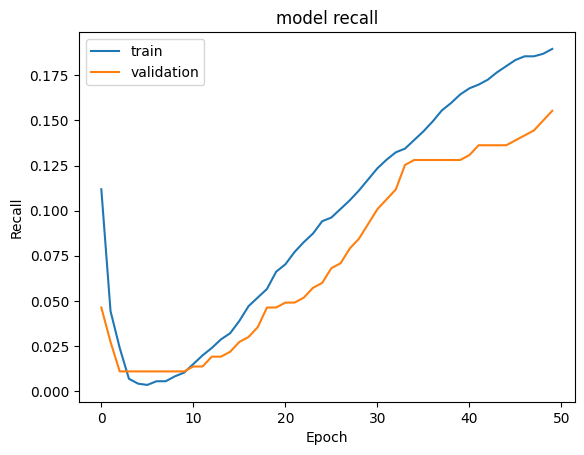

In [3996]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [3997]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [3998]:
# Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [3999]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [4000]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      5734
         1.0       0.64      0.19      0.29      1466

    accuracy                           0.81      7200
   macro avg       0.73      0.58      0.59      7200
weighted avg       0.79      0.81      0.77      7200



In [4001]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1433
         1.0       0.60      0.16      0.25       367

    accuracy                           0.81      1800
   macro avg       0.71      0.56      0.57      1800
weighted avg       0.77      0.81      0.76      1800



**Confusion matrix**

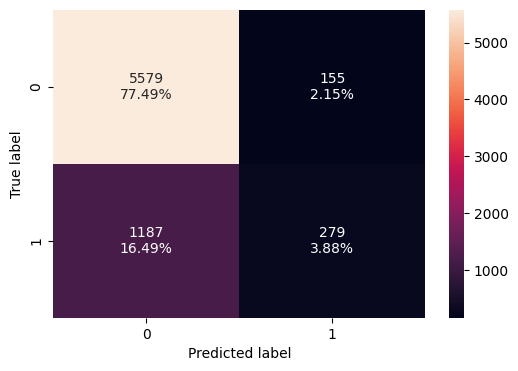

In [4002]:
make_confusion_matrix(y_train, y_train_pred)

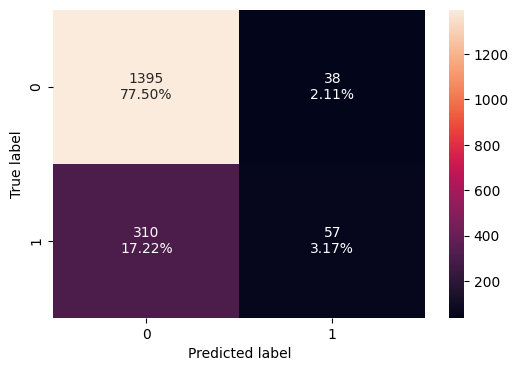

In [4003]:
make_confusion_matrix(y_val, y_val_pred)

**Observations**
- This base model with SGD as optimizer is performing poorly
- Let's change the optimizer to Adam and validate the performance

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [4004]:
backend.clear_session() # clear the session to avoid clutter from old models    
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [4005]:
# Initializing the neural network
model_1 = Sequential()
# Adding the input layer and the first hidden layer
model_1.add(Dense(62, activation="relu", input_dim=X_train.shape[1]))
# Adding the second hidden layer
model_1.add(Dense(32, activation="relu"))
# Adding the third hidden layer
model_1.add(Dense(1, activation="sigmoid"))

In [4006]:
optimizer = tf.keras.optimizers.Adam()
metric = tf.keras.metrics.Recall()

In [4007]:
# Compliling the model with binary cross entropy as loss function and recall as the metric.
model_1.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[metric],
)

In [4008]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 62)             │           744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,793 (10.91 KB)

 Trainable params: 2,793 (10.91 KB)

 Non-trainable params: 0 (0.00 B)

In [4009]:
# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [4010]:
# Fitting the model
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping],
)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5423 - recall: 0.0547 - val_loss: 0.4398 - val_recall: 0.1253
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.4139 - recall: 0.1530 - val_loss: 0.4294 - val_recall: 0.2153
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.4003 - recall: 0.2378 - val_loss: 0.4228 - val_recall: 0.2616
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.3916 - recall: 0.2925 - val_loss: 0.4165 - val_recall: 0.2807
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.3830 - recall: 0.3260 - val_loss: 0.4100 - val_recall: 0.2861
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.3743 - recall: 0.3509 - val_loss: 0.4041 - val_recall: 0.2997
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.3664 - recall: 0.3601 - val_loss: 0.3988 - val_recall: 0.3052
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.3587 - recall: 0.3718 - val_loss: 0.3952 - val_r

**Loss function**

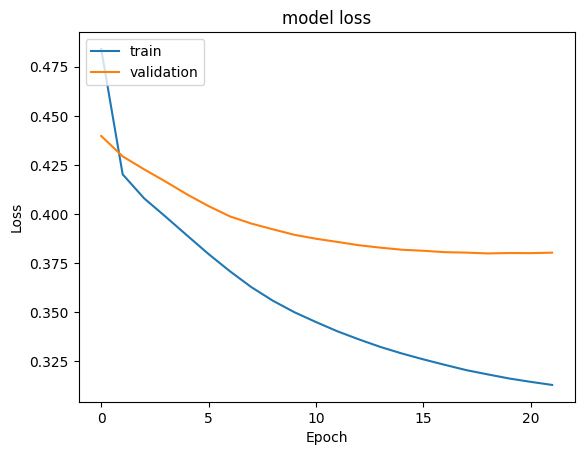

In [4011]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

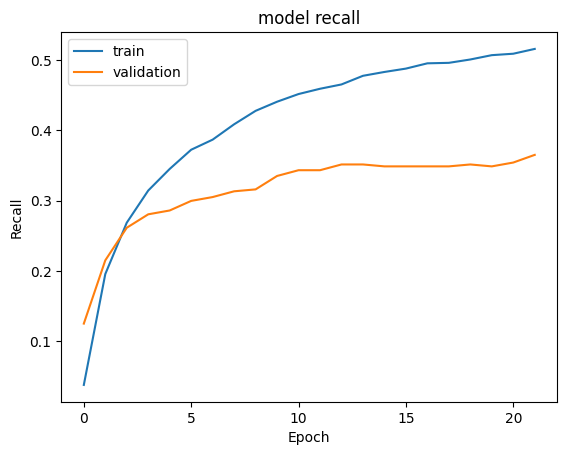

In [4012]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step
Best Threshold=0.143163, G-Mean=0.809


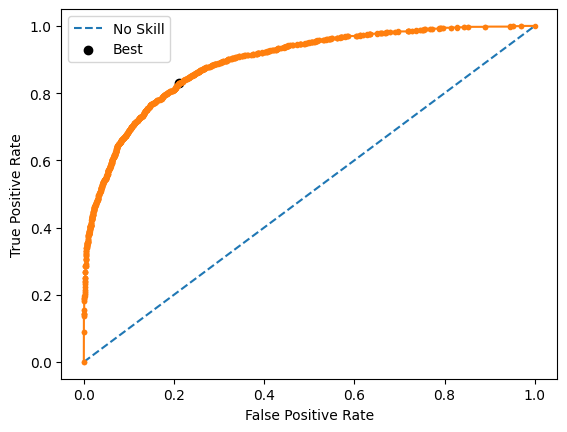

In [4013]:
# Predicting probabilities.
yhat1 = model_1.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat1 = yhat1[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds1 = roc_curve(y_train, yhat1)
# Calculating the g-mean for each threshold.
gmeans1 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [4014]:
#Predicting the results using best threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > thresholds1[ix])
y_train_pred

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [4015]:
#Predicting the results using best threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > thresholds1[ix])
y_val_pred

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [4016]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [4017]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      5734
         1.0       0.50      0.83      0.62      1466

    accuracy                           0.80      7200
   macro avg       0.72      0.81      0.74      7200
weighted avg       0.86      0.80      0.81      7200



In [4018]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      1433
         1.0       0.45      0.72      0.56       367

    accuracy                           0.77      1800
   macro avg       0.68      0.75      0.70      1800
weighted avg       0.82      0.77      0.78      1800



**Confusion matrix**

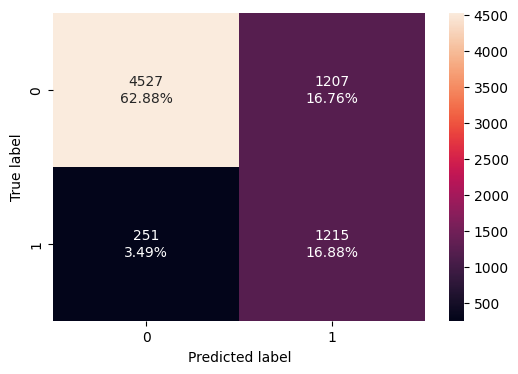

In [4019]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

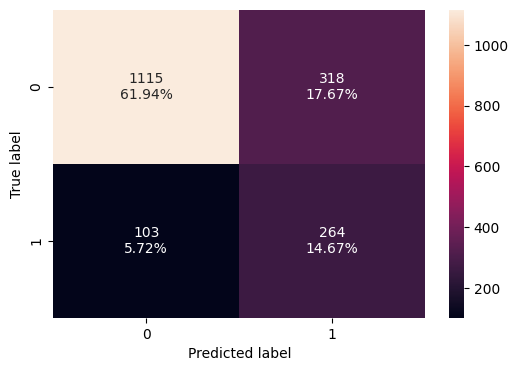

In [4020]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Observations**
- This model with optimizer Adam have improved on training with recall as 83%
- However this the viariation between training and validation make this model a overfit. 
- Results in 5.72% of customers exiting without bank attempting to intervene.
- Lets add dropout layer and validate the performance.

### Neural Network with Adam Optimizer and Dropout

In [4021]:
backend.clear_session() # clear the session to avoid clutter from old models
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [4022]:
# Initializing the neural network
model_2 = Sequential()
# Adding the input layer and the first hidden layer
model_2.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
# Adding a dropout layer
model_2.add(Dropout(0.2))
# Adding the second hidden layer
model_2.add(Dense(16, activation="relu"))
# Adding a dropout layer
model_2.add(Dense(8, activation="relu"))
# Adding the output layer
model_2.add(Dense(1, activation="sigmoid"))

In [4023]:
optimizer = tf.keras.optimizers.Adam(0.01)
metric = tf.keras.metrics.Recall()

In [4024]:
# Compiling the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[metric],
)

In [4025]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [4026]:
# Fitting the model
history_2 = model_2.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping],
)

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 0.4527 - recall: 0.1294 - val_loss: 0.4208 - val_recall: 0.2098
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.4021 - recall: 0.2611 - val_loss: 0.4162 - val_recall: 0.2752
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.3930 - recall: 0.3053 - val_loss: 0.4104 - val_recall: 0.2752
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.3772 - recall: 0.3576 - val_loss: 0.3911 - val_recall: 0.3433
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.3737 - recall: 0.3716 - val_loss: 0.3983 - val_recall: 0.2943
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.3625 - recall: 0.3857 - val_loss: 0.3764 - val_recall: 0.3243
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.3487 - recall: 0.4230 - val_loss: 0.3784 - val_recall: 0.3433
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.3495 - recall: 0.4023 - val_loss: 0.3761 - val_recall:

**Loss function**

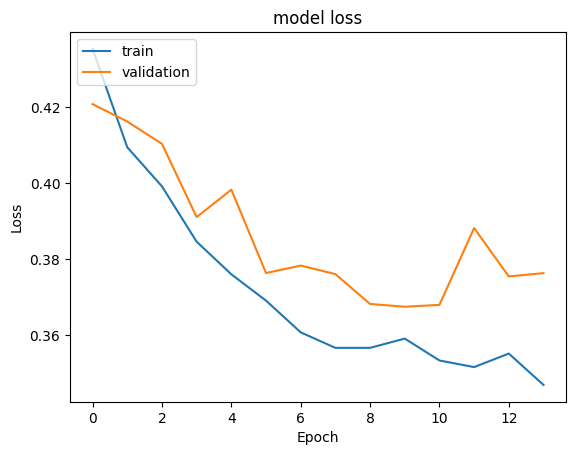

In [4027]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

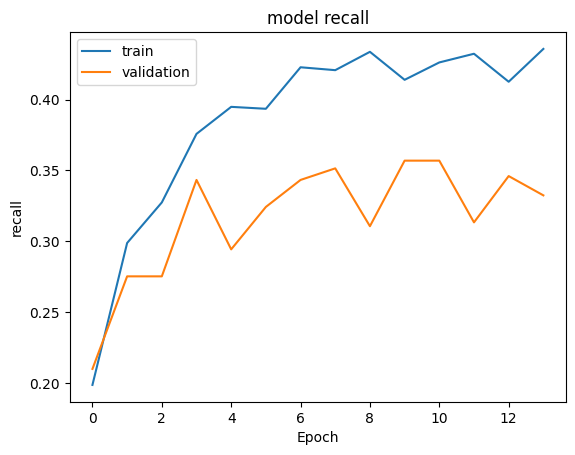

In [4028]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step
Best Threshold=0.161388, G-Mean=0.794


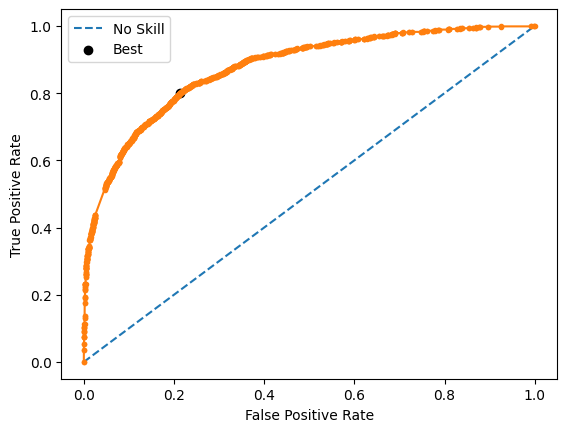

In [4029]:
# Predicting probabilities.
yhat2 = model_2.predict(X_train)
# Keeping probabilities for the positive outcomes only.
yhat2 = yhat2[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds2 = roc_curve(y_train, yhat2)
# Calculating the g-mean for each threshold.
gmeans2 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [4030]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > thresholds2[ix])
y_train_pred

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [4031]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > thresholds2[ix])
y_val_pred

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [4032]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [4033]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      5734
         1.0       0.49      0.80      0.61      1466

    accuracy                           0.79      7200
   macro avg       0.71      0.79      0.73      7200
weighted avg       0.85      0.79      0.81      7200



In [4034]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      1433
         1.0       0.46      0.73      0.57       367

    accuracy                           0.77      1800
   macro avg       0.69      0.76      0.71      1800
weighted avg       0.83      0.77      0.79      1800



**Confusion matrix**

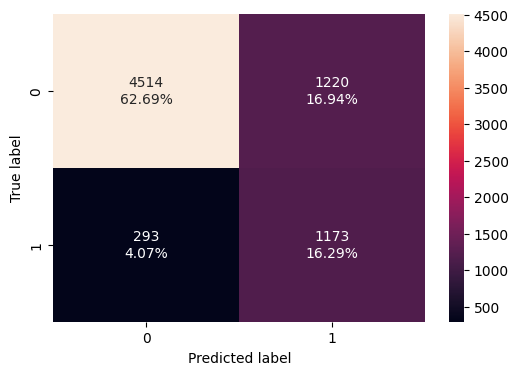

In [4035]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

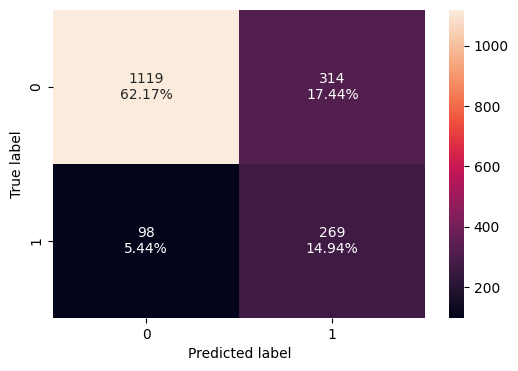

In [4036]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Observations**
- Adding a dropout layer with 0.2 have reduced the loss between training and validation.
- Results in 5.44% of customers exiting without bank attempting to intervene.
- Since the data is unbalanced, lets try with balanced data.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [4037]:
sm  = SMOTE(random_state=42)  
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (11468, 11)
After UpSampling, the shape of train_y: (11468,) 



In [4038]:
y_train_smote.value_counts()

Exited
0.0    5734
1.0    5734
Name: count, dtype: int64

** Lets build a model with the balanced dataset**

In [4039]:
backend.clear_session() # clear the session to avoid clutter from old models
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [4040]:
# Initializing the neural network
model_3 = Sequential()
# Adding the input layer and the first hidden layer
model_3.add(Dense(32, activation="relu", input_dim=X_train_smote.shape[1]))
# Adding the second hidden layer
model_3.add(Dense(16, activation="relu"))
# Adding the third hidden layer
model_3.add(Dense(8, activation="relu"))
# Adding the output layer
model_3.add(Dense(1, activation="sigmoid"))

In [4041]:
optimizer = tf.keras.optimizers.SGD(0.01)
metric = tf.keras.metrics.Recall()

In [4042]:
# Compiling the model with binary cross entropy as loss function and recall as the metric.
model_3.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[metric],
)

In [4043]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [4044]:
# Fitting the model
history_3 = model_3.fit(
    X_train_smote,
    y_train_smote,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping],
)

Epoch 1/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.6940 - recall: 0.8747 - val_loss: 0.6444 - val_recall: 0.6185
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.6527 - recall: 0.6422 - val_loss: 0.5975 - val_recall: 0.6213
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.6088 - recall: 0.6954 - val_loss: 0.5714 - val_recall: 0.6376
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.5762 - recall: 0.7208 - val_loss: 0.5577 - val_recall: 0.6403
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.5618 - recall: 0.7270 - val_loss: 0.5535 - val_recall: 0.6567
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.5545 - recall: 0.7291 - val_loss: 0.5513 - val_recall: 0.6594
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.5497 - recall: 0.7302 - val_loss: 0.5496 - val_recall: 0.6594
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.5462 - recall: 0.7320 - val_loss: 0.5469 - val_recall:

**Loss function**

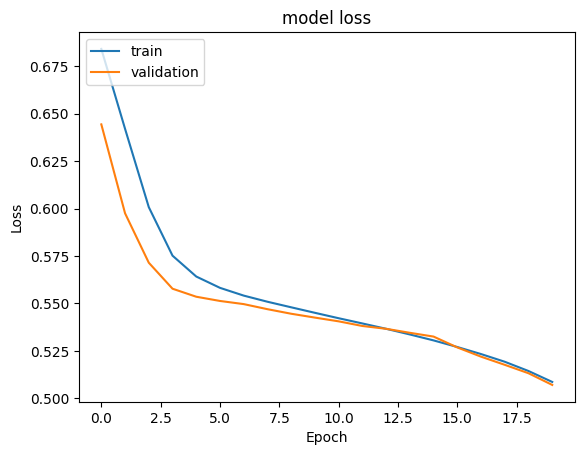

In [4045]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

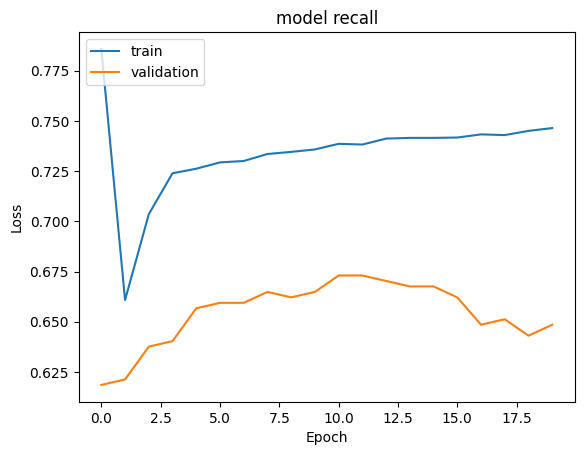

In [4046]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step
Best Threshold=0.486068, G-Mean=0.741


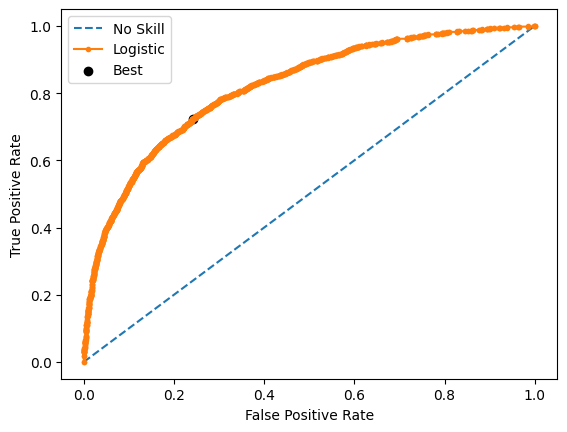

In [4047]:
# Predicting probabilities.
yhat3 = model_3.predict(X_train)
# Keeping probabilities for the positive outcome only.
yhat3 = yhat3[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds3 = roc_curve(y_train, yhat3)
# Calculating the g-mean for each threshold.
gmeans3 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [4048]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using the best threshold
y_train_pred = (y_train_pred > thresholds3[ix])
y_train_pred

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [4049]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using the best threshold
y_val_pred = (y_val_pred > thresholds3[ix])
y_val_pred

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [4050]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [4051]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      5734
         1.0       0.76      0.75      0.75      5734

    accuracy                           0.75     11468
   macro avg       0.75      0.75      0.75     11468
weighted avg       0.75      0.75      0.75     11468



In [4052]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      1433
         1.0       0.42      0.67      0.52       367

    accuracy                           0.75      1800
   macro avg       0.66      0.72      0.67      1800
weighted avg       0.80      0.75      0.76      1800



**Confusion matrix**

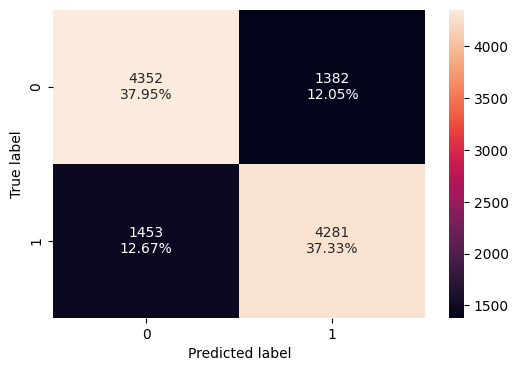

In [4053]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

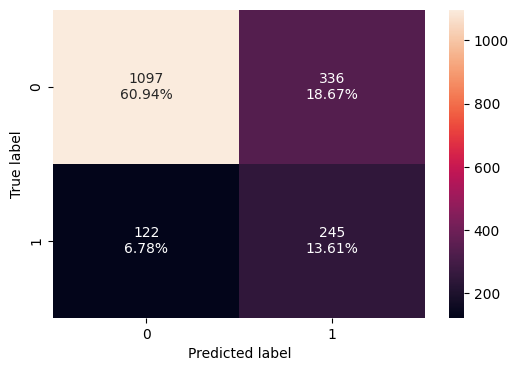

In [4054]:
#Calculating the confusion matrix

make_confusion_matrix(y_val, y_val_pred)

**Observations**
- The balanced data with SGD optimizer did not imporve the model much. 
- Results in 6.78% of customers exiting without the bank attempting to intervene.
- lets try with Adam optimizer.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [4055]:
backend.clear_session() # clear the session to avoid clutter from old models
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [4056]:
# Initializing the neural network
model_4 = Sequential()
# Adding the input layer and the first hidden layer
model_4.add(Dense(32, activation="relu", input_dim=X_train_smote.shape[1]))
# Adding the second hidden layer
model_4.add(Dense(16, activation="relu"))
# Adding the output layer
model_4.add(Dense(1, activation="sigmoid"))

In [4057]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [4058]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = tf.keras.metrics.Recall()

In [4059]:
# Compiling the model with binary cross entropy as loss function and recall as the metric.
model_4.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[metric],
)

In [4060]:
# Fitting the model
history_4 = model_4.fit(
    X_train_smote,
    y_train_smote,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping],
)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: 0.6258 - recall: 0.6477 - val_loss: 0.5440 - val_recall: 0.6594
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.5384 - recall: 0.7542 - val_loss: 0.5143 - val_recall: 0.6676
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.5025 - recall: 0.7663 - val_loss: 0.4999 - val_recall: 0.6866
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.4762 - recall: 0.7738 - val_loss: 0.4898 - val_recall: 0.6894
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.4590 - recall: 0.7769 - val_loss: 0.4810 - val_recall: 0.6812
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.4466 - recall: 0.7784 - val_loss: 0.4763 - val_recall: 0.6839
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.4368 - recall: 0.7864 - val_loss: 0.4725 - val_recall: 0.6921
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.4283 - recall: 0.7917 - val_loss: 0.4684 - val_recall:

**Loss function**

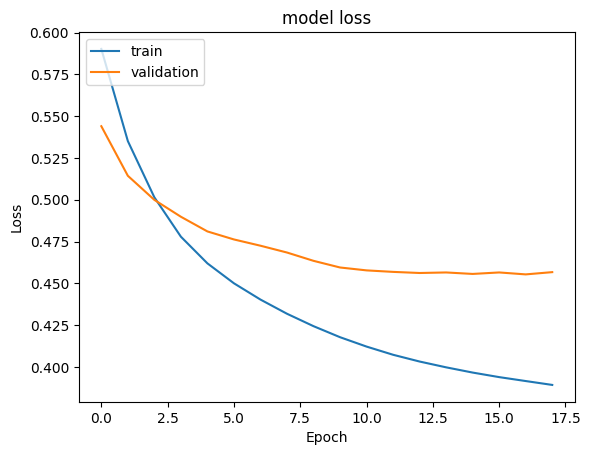

In [4061]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

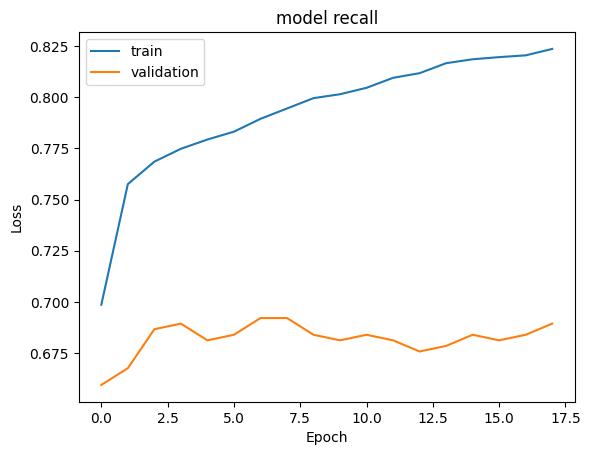

In [4062]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
Best Threshold=0.484631, G-Mean=0.807


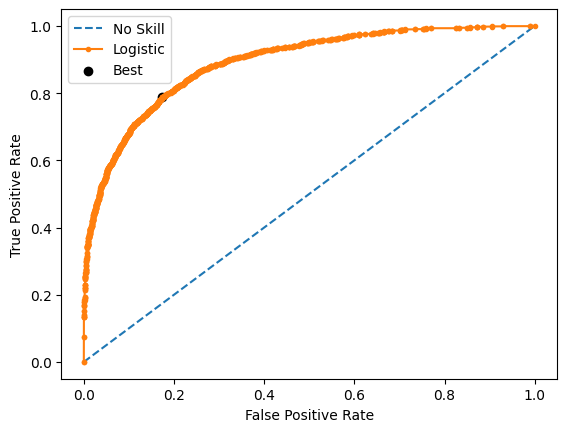

In [4063]:
# Predicting probabilities.
yhat4 = model_4.predict(X_train)
# Keeping probabilities for the positive outcome only.
yhat4 = yhat4[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds4 = roc_curve(y_train, yhat4)
# Calculating the g-mean for each threshold.
gmeans4 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [4064]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using the best threshold
y_train_pred = (y_train_pred > thresholds4[ix])
y_train_pred

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [4065]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using the best threshold
y_val_pred = (y_val_pred > thresholds4[ix])
y_val_pred

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [4066]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [4067]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      5734
         1.0       0.82      0.82      0.82      5734

    accuracy                           0.82     11468
   macro avg       0.82      0.82      0.82     11468
weighted avg       0.82      0.82      0.82     11468



In [4068]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86      1433
         1.0       0.49      0.70      0.57       367

    accuracy                           0.79      1800
   macro avg       0.70      0.76      0.72      1800
weighted avg       0.83      0.79      0.80      1800



**Confusion matrix**

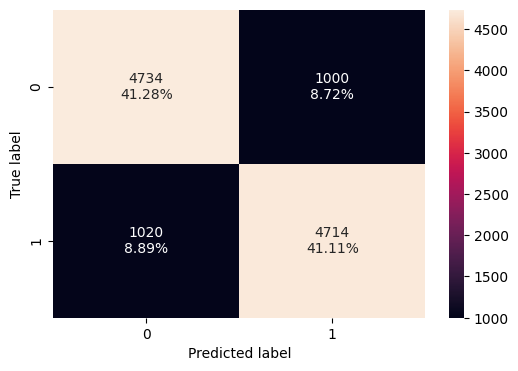

In [4069]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

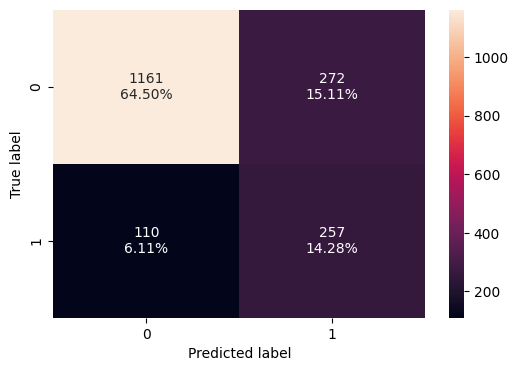

In [4070]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Observations**
- The recall improved on training to 82 however this model still a overfit as validation drops to 70.
- Results in only 6.11% of customers leaving without the bank attempting to intervene.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [4071]:
backend.clear_session() # clear the session to avoid clutter from old models
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [4072]:
# Initializing the neural network
model_5 = Sequential()
# Adding the input layer and the first hidden layer
model_5.add(Dense(64, activation="relu", input_dim=X_train_smote.shape[1]))
# Adding a dropout layer
model_5.add(Dropout(0.2))
# Adding the second hidden layer
model_5.add(Dense(16, activation="relu"))
# Adding the third hidden layer
model_5.add(Dense(8, activation="relu"))
# Adding the output layer
model_5.add(Dense(1, activation="sigmoid"))

In [4073]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = tf.keras.metrics.Recall()

In [4074]:
# Compiling the model with binary cross entropy as loss function and recall as the metric.
model_5.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[metric],
)

In [4075]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,953 (7.63 KB)

 Trainable params: 1,953 (7.63 KB)

 Non-trainable params: 0 (0.00 B)

In [4076]:
# Fitting the model
history_5 = model_5.fit(
    X_train_smote,
    y_train_smote,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping],
)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.6370 - recall: 0.7596 - val_loss: 0.5212 - val_recall: 0.6240
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.5480 - recall: 0.7187 - val_loss: 0.5189 - val_recall: 0.6703
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.5289 - recall: 0.7351 - val_loss: 0.5023 - val_recall: 0.6567
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.5065 - recall: 0.7498 - val_loss: 0.4962 - val_recall: 0.6649
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.4907 - recall: 0.7626 - val_loss: 0.4872 - val_recall: 0.6757
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.4782 - recall: 0.7765 - val_loss: 0.4707 - val_recall: 0.6649
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.4647 - recall: 0.7739 - val_loss: 0.4564 - val_recall: 0.6485
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.4528 - recall: 0.7740 - val_loss: 0.4550 - val_recall:

**Loss function**

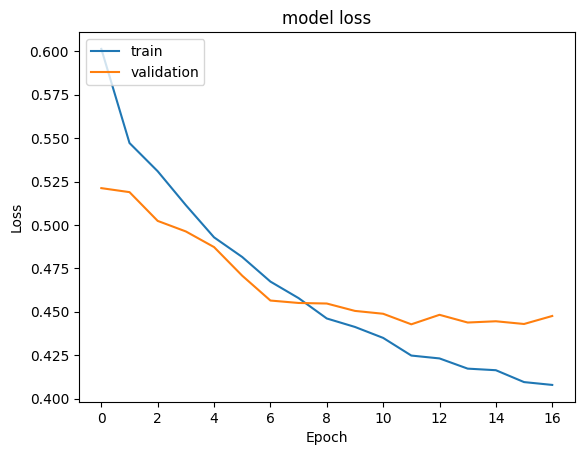

In [4077]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

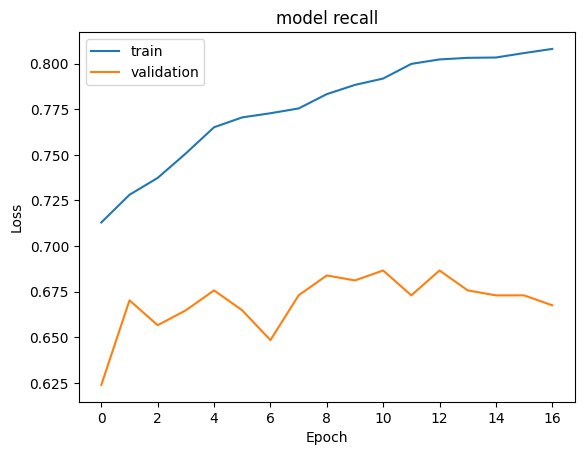

In [4078]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step
Best Threshold=0.396690, G-Mean=0.807


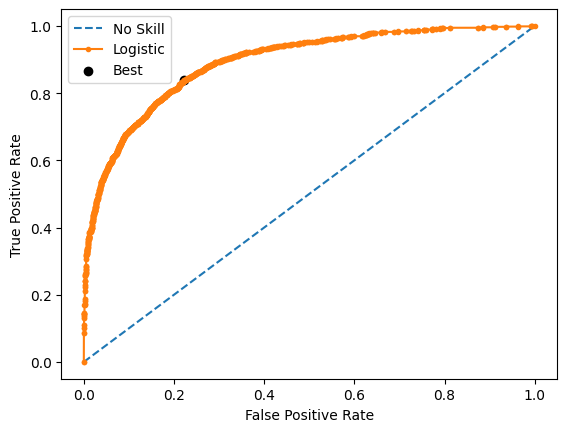

In [4079]:
# Predicting probabilities.
yhat5 = model_5.predict(X_train)
# Keeping probabilities for the positive outcome only.
yhat5 = yhat5[:, 0]
# Calculating roc curves.
fpr, tpr, thresholds5 = roc_curve(y_train, yhat5)
# Calculating the g-mean for each threshold.
gmeans5 = np.sqrt(tpr * (1-fpr))
# Locating the index of the largest g-mean.
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# Plotting the roc curve for the model.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Showing the plot.
plt.show()

In [4080]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using the best threshold
y_train_pred = (y_train_pred > thresholds5[ix])
y_train_pred

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [4081]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using the best threshold
y_val_pred = (y_val_pred > thresholds5[ix])
y_val_pred

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [4082]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [4083]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      5734
         1.0       0.80      0.87      0.83      5734

    accuracy                           0.83     11468
   macro avg       0.83      0.83      0.83     11468
weighted avg       0.83      0.83      0.83     11468



In [4084]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.84      1433
         1.0       0.45      0.75      0.56       367

    accuracy                           0.76      1800
   macro avg       0.69      0.76      0.70      1800
weighted avg       0.83      0.76      0.78      1800



**Confusion matrix**

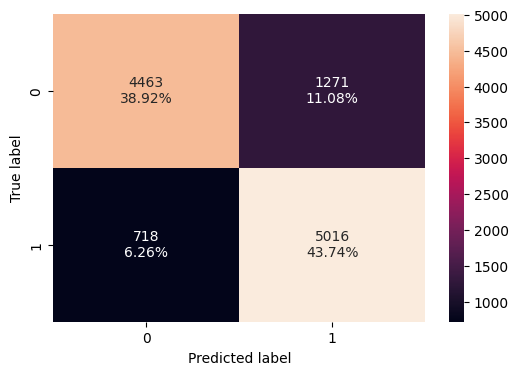

In [4085]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

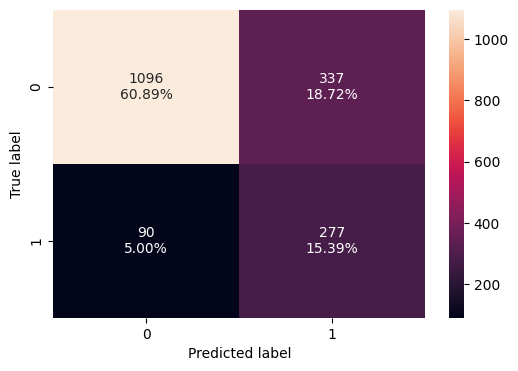

In [4086]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Observations**
- The model recall is at 87 in training and 75 in testing. 
- The difference between training and validation at 12%.
- Results in 5% of customers exiting without the bank attempting to intervene.

## Model Performance Comparison and Final Model Selection

In [4087]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.190314
NN with Adam,0.828786
NN with Adam & Dropout,0.800136
NN with SMOTE & SGD,0.746599
NN with SMOTE & Adam,0.822114
"NN with SMOTE,Adam & Dropout",0.874782


In [4088]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.155313
NN with Adam,0.719346
NN with Adam & Dropout,0.732970
NN with SMOTE & SGD,0.667575
NN with SMOTE & Adam,0.700272
"NN with SMOTE,Adam & Dropout",0.754768


In [4089]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.035000
NN with Adam,0.109440
NN with Adam & Dropout,0.067166
NN with SMOTE & SGD,0.079024
NN with SMOTE & Adam,0.121841
"NN with SMOTE,Adam & Dropout",0.120014


In [4090]:
y_test_pred = model_2.predict(X_test)
y_test_pred = (y_test_pred > thresholds2[ix])
print(y_test_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [Fals

In [4091]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78       796
         1.0       0.39      0.87      0.54       204

    accuracy                           0.70      1000
   macro avg       0.67      0.76      0.66      1000
weighted avg       0.84      0.70      0.73      1000



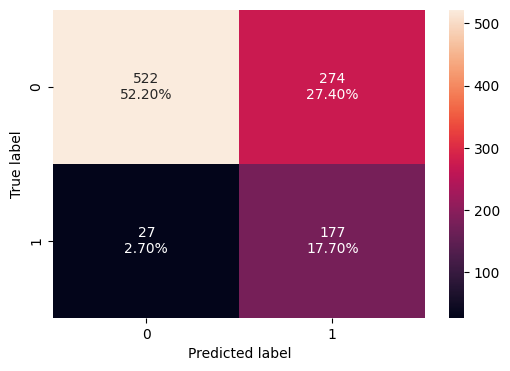

In [4092]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

**Final Model**
- The best model is NN with Adam & Dropout (model_2) with only 2.7% of customers exiting without bank attempting to intervene. 
- The recall score on the test data is at 87 (for class 1). 

## Actionable Insights and Business Recommendations

**Insights**
* Active members have less churn rate
* Churn rate is higher with customers with higher age
* As number of products goes up, churn rate goes down

**Recommendatio**
* Introduce programs and offers that encourage the members to more activily use bank products (such as credit cards).
* Introduce new products that attracts the customer to buy so the churn rate might lower with those customers.
* Pay additional attention to customers above 45 to understand the higher churn rate.

<font size=6 color='blue'>Power Ahead</font>
___